In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [28]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\한국법제연구원 연속간행물 메타데이터 정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\한국법제연구원 연속간행물 메타데이터 정보\\한국법제연구원 연속간행물 메타데이터 정보_20190916.csv']

In [29]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,표제,저자,권호,연구원명,간행물명,발행일
0,발간사,박세진,아시아법제연구제07호,한국법제연구원,아시아법제연구,2007-03-25
1,말레이시아의 사법제도와 소송외 분쟁해결제도,류창호,아시아법제연구제07호,한국법제연구원,아시아법제연구,2007-03-25
2,베트남의 사법제도와 소송외 분쟁해결제도 - 환경분쟁해결을 중심으로 -,이순태,아시아법제연구제07호,한국법제연구원,아시아법제연구,2007-03-25
3,인도네시아사의 사법제도와 소송외 분쟁해결제도,최환용,아시아법제연구제07호,한국법제연구원,아시아법제연구,2007-03-25
4,인도의 사법제도와 소송외 분쟁해결제도,박찬호,아시아법제연구제07호,한국법제연구원,아시아법제연구,2007-03-25


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표제      3106 non-null   object
 1   저자      3100 non-null   object
 2   권호      3106 non-null   object
 3   연구원명    3106 non-null   object
 4   간행물명    3106 non-null   object
 5   발행일     3106 non-null   object
dtypes: object(6)
memory usage: 145.7+ KB


In [31]:
df.describe()

,표제,저자,권호,연구원명,간행물명,발행일
count,3106,3100,3106,3106,3106,3106
unique,2934,1264,286,1,8,263
top,머리말,KLRI,최신외국법제정보 2011 제1호,한국법제연구원,최신외국법제정보,2010-12-20
freq,25,167,26,3106,991,31


In [32]:
def to_year(x):
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.year

def to_month(x):
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.month

df['연도'] = df['발행일'].apply(to_year)
df['월'] = df['발행일'].apply(to_month)

In [38]:
df['간행물명'] = df['간행물명'].apply(lambda x : '법제연구' if x=='법연' else x)

In [62]:
df = df.astype({'저자':'str'})

In [63]:
df.describe(include=np.object)

,표제,저자,권호,연구원명,간행물명,발행일
count,3106,3106,3106,3106,3106,3106
unique,2934,1265,286,1,7,263
top,머리말,KLRI,최신외국법제정보 2011 제1호,한국법제연구원,법제연구,2010-12-20
freq,25,167,26,3106,1685,31


## 시각화

[Text(0.5, 1.0, '간행물별 분포')]

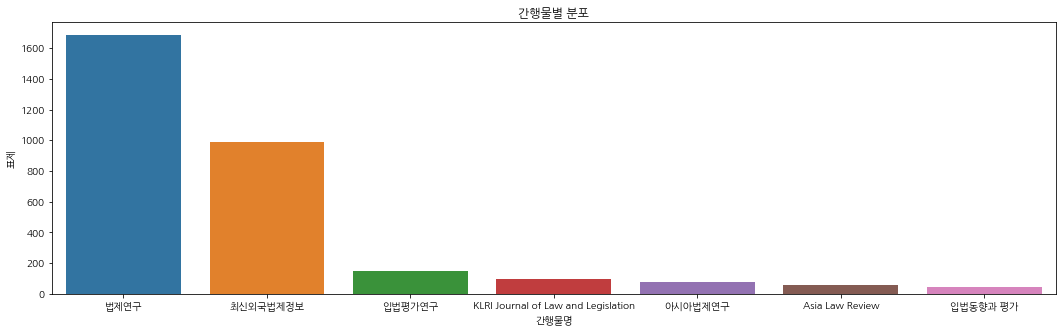

In [41]:
sub_df = df.groupby('간행물명',as_index=False)['표제'].count().sort_values('표제',ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='간행물명',y='표제').set(title='간행물별 분포')

[Text(0.5, 1.0, '연도별 분포')]

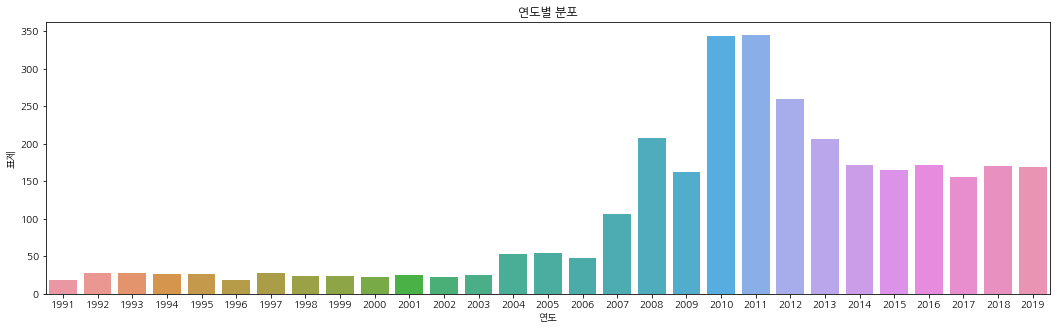

In [37]:
sub_df = df.groupby('연도',as_index=False)['표제'].count().sort_values('연도')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='연도',y='표제').set(title='연도별 분포')

[Text(0.5, 1.0, '월별 분포')]

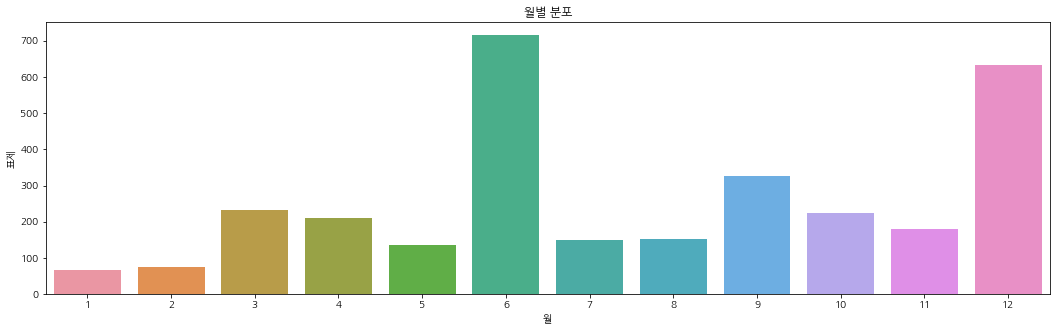

In [43]:
sub_df = df.groupby('월',as_index=False)['표제'].count().sort_values('월')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='월',y='표제').set(title='월별 분포')

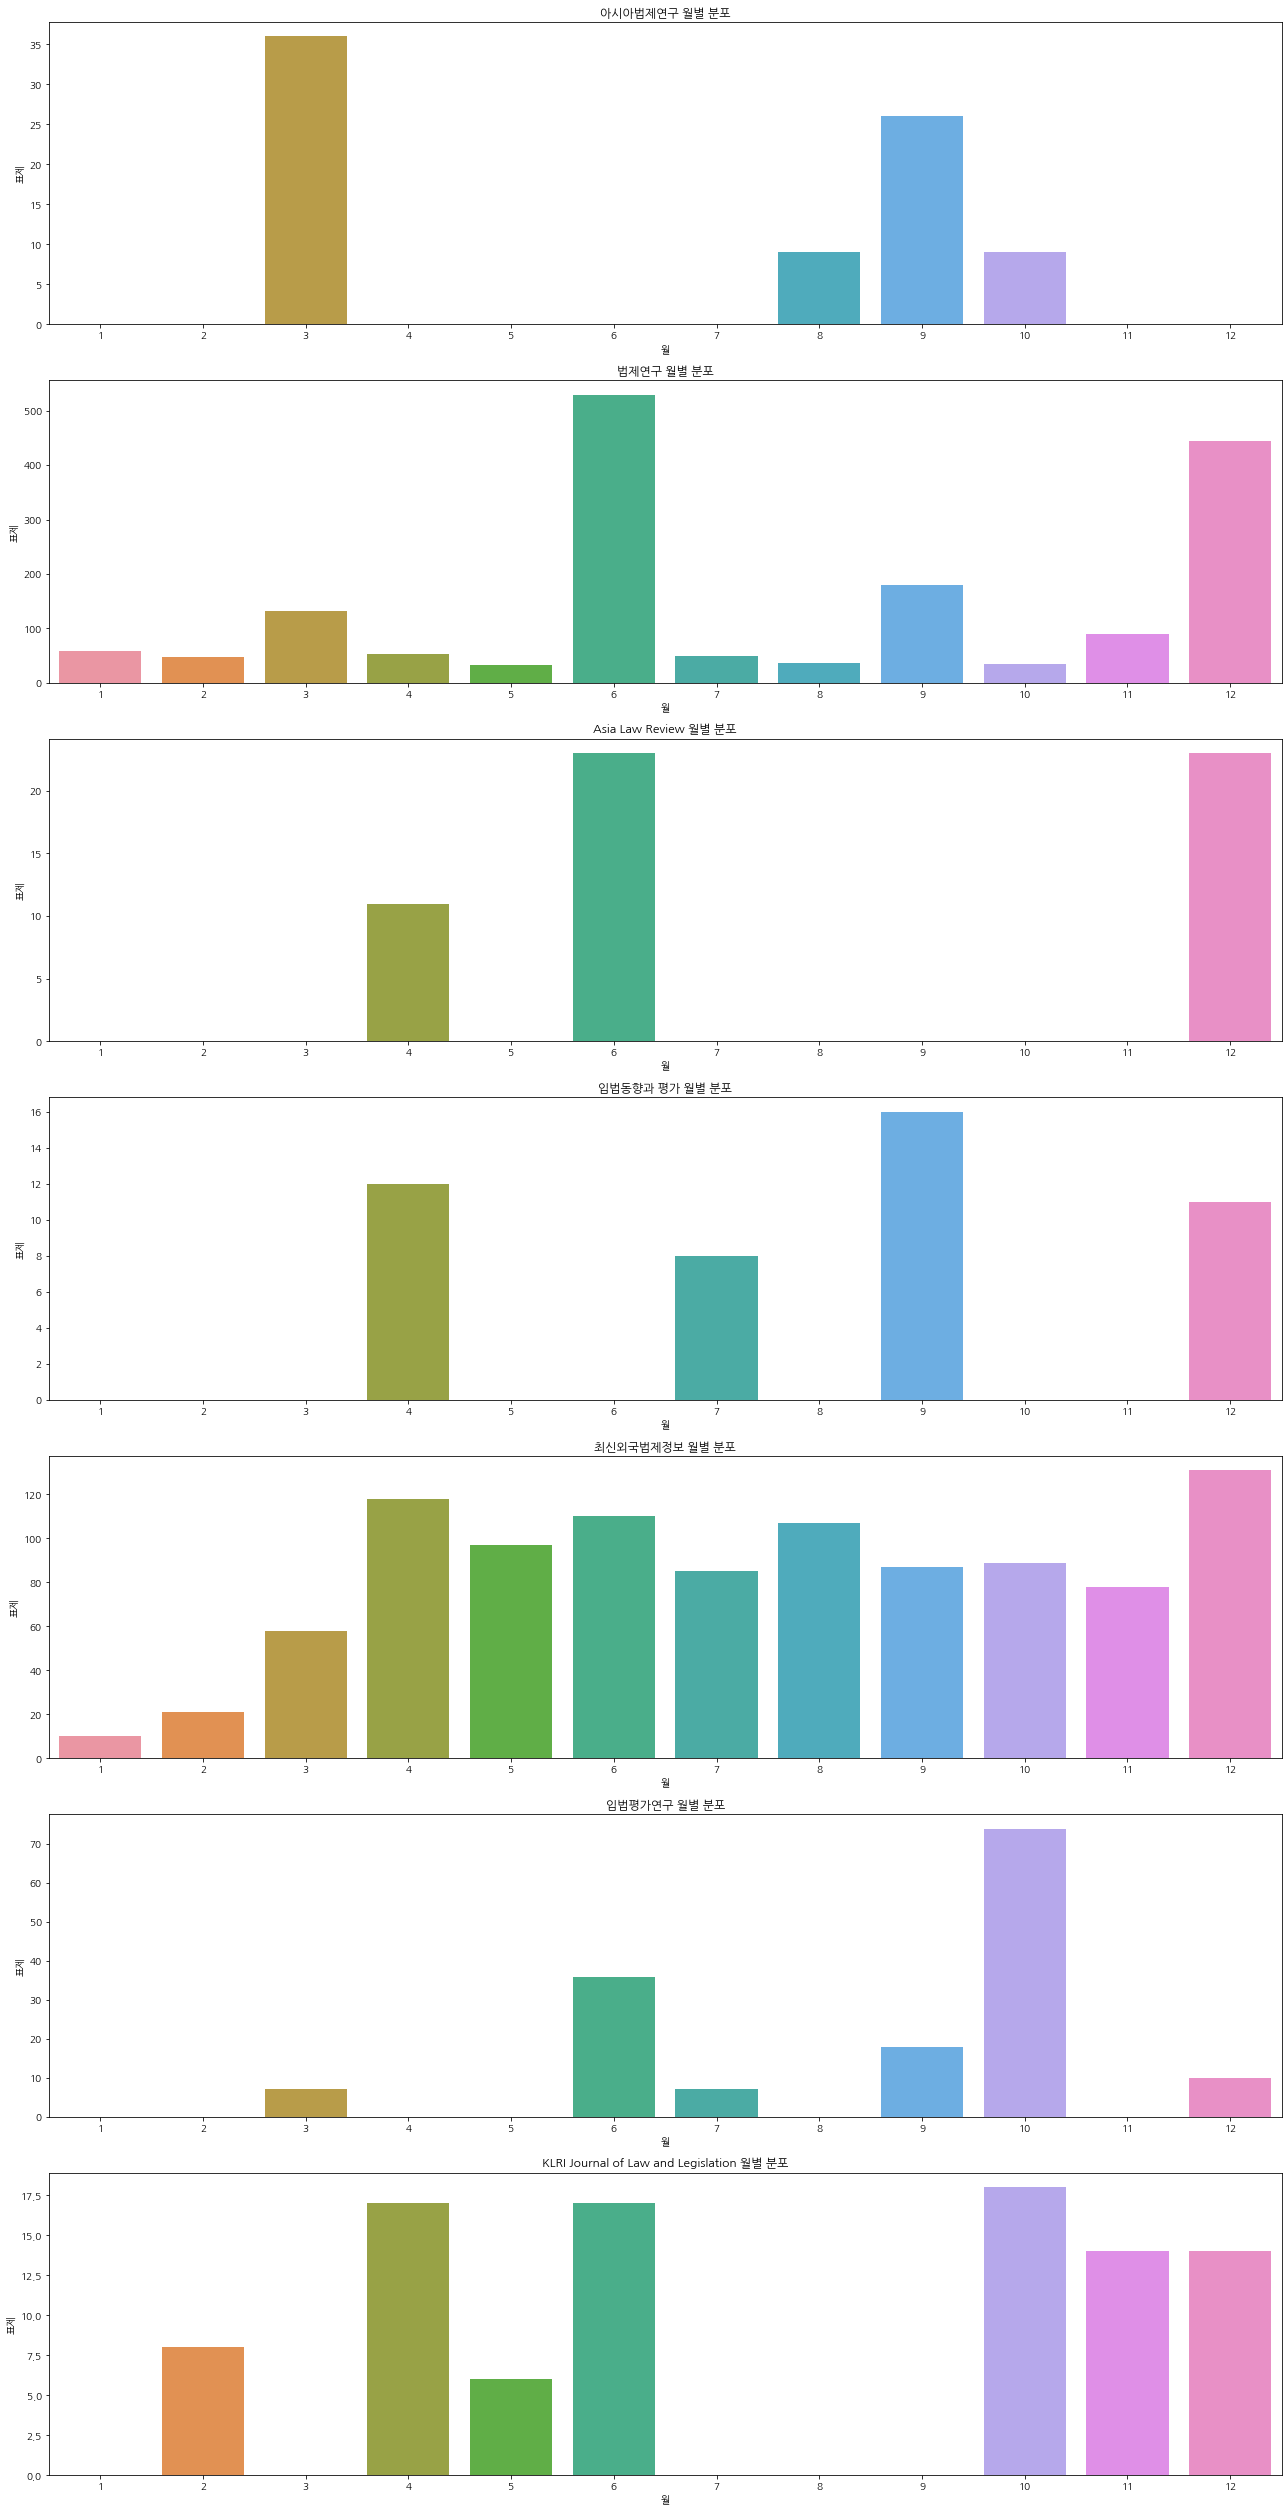

In [57]:
fig,axes = plt.subplots(7,1,figsize=(18,5*7))
for i,c in enumerate(df['간행물명'].unique()):
    sub_df = df[df['간행물명']==c].groupby('월',as_index=False)['표제'].count().sort_values('월')
    sns.barplot(data=sub_df,x='월',y='표제',ax=axes[i],order=[i for i in range(1,13)]).set(title=f'{c} 월별 분포')
plt.tight_layout()

In [60]:
df['저자'].unique()

array(['박세진', '류창호', '이순태', ..., '전병서', '박효민', '김한택'], dtype=object)

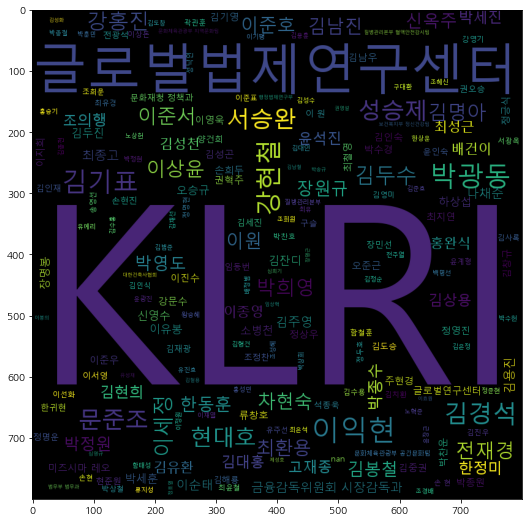

In [64]:
c = Counter(df['저자'].values)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)

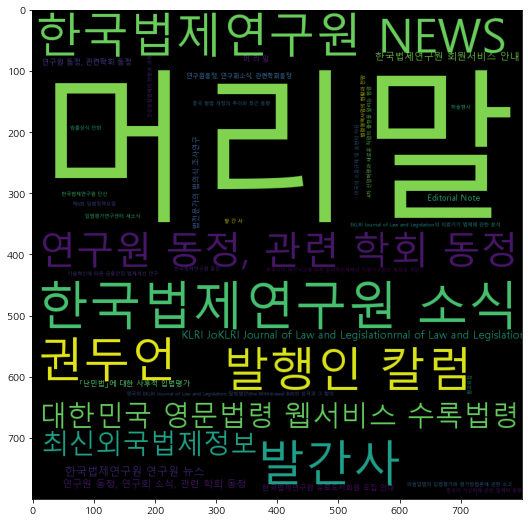

In [68]:
c = Counter(df['표제'].values)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)